In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
from fastai.vision.all import *
import fastai
from fastai import *



In [19]:
path=Path('../input/potatoes/Potatoes/Train')

In [20]:
path.ls()

(#3) [Path('../input/potatoes/Potatoes/Train/Diseased'),Path('../input/potatoes/Potatoes/Train/Rotten'),Path('../input/potatoes/Potatoes/Train/Healthy')]

In [21]:

potato = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(),   
    )

In [22]:
dls = potato.dataloaders(path)


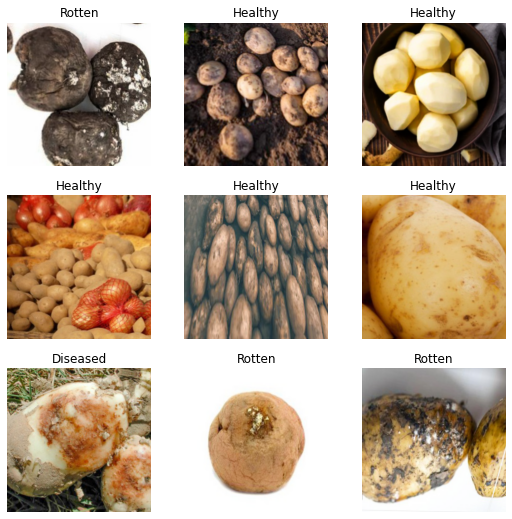

In [23]:
dls.show_batch()

In [24]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.001737800776027143)

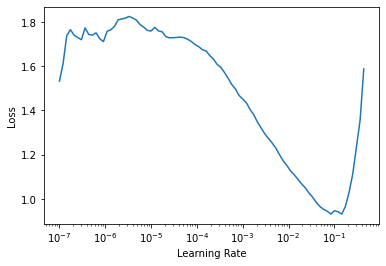

In [25]:
learn.lr_find()


In [26]:
learn.fit_one_cycle(3,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.795856,1.801209,0.644366,00:13
1,0.452248,0.428341,0.852113,00:13
2,0.296310,0.257202,0.915493,00:13


In [27]:
learn.unfreeze()


SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=6.309573450380412e-07)

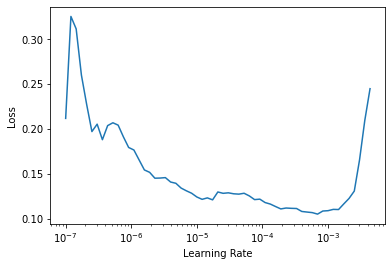

In [28]:
learn.lr_find()

In [29]:
learn.fit_one_cycle(6,lr_max=slice(1e-5,5e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.143807,0.298711,0.880282,00:16
1,0.112514,0.217614,0.911972,00:16
2,0.085401,0.451952,0.866197,00:16
3,0.064040,0.702646,0.813380,00:17
4,0.051383,0.456720,0.873239,00:17
5,0.045011,0.457873,0.862676,00:17


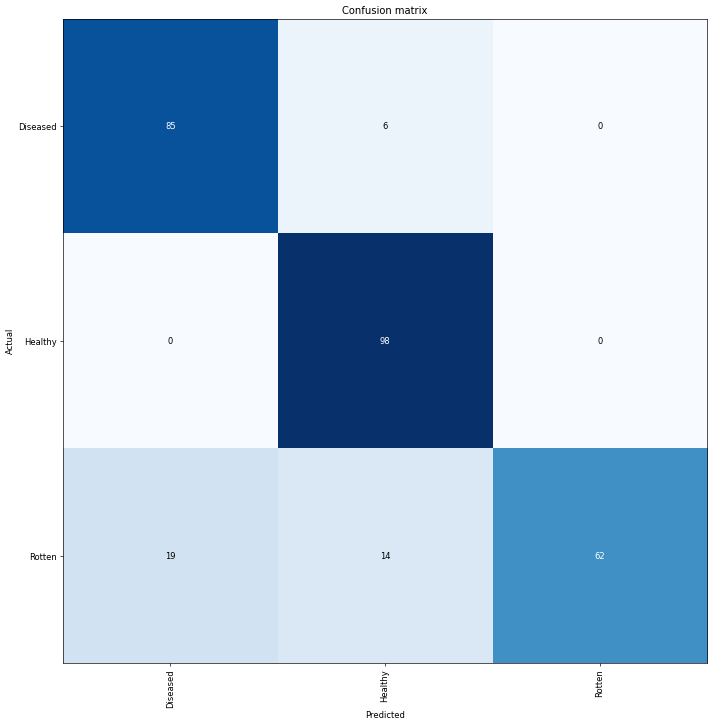

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

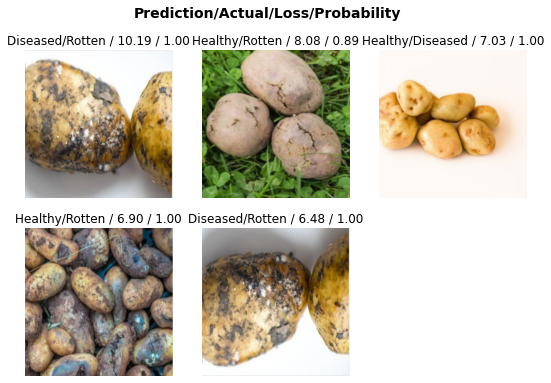

In [31]:
interp.plot_top_losses(5,nrows=2)

In [32]:
# from fastai.callback.fp16 import *
# learn2 = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()


In [33]:
# learn2.lr_find()

In [34]:
# learn2.fine_tune(4,base_lr=1e-3)


In [35]:
# learn2.fit_one_cycle(3, 3e-3)

In [36]:
# learn2.unfreeze()


In [37]:
# learn2.lr_find()

In [38]:
# learn2.fit_one_cycle(12,lr_max=1e-6)
